# Задача 17.338 (Метод барьерных функций)

#### Решить задачу нелинейного программирования методом барьерных функций

In [1]:
#Подключаем все нужные библиотеки.
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
#Задаем все нужные переменные.
x = [-1, 1] #Начальное приближение.
eps = 0.05 #Точность.
r = 3.0 #Коэфицент масштабирования штрафа
delta = 0.1 #Коэфицент масштабирования r

In [3]:
#Задаем функции.
def func(x): #Вычисляет значение нашей функции в точке x.
    return -x[0] - 5*x[1] 

def g1(x): #Ограничение функции (первое)
    return x[0] + x[1]**2 - 1

def g2(x): #Ограничение функции (второе)
    return -x[0] + 2*x[1] 

def shtrafFunc(x, g): #Функция штрафа (барьерная).
    return -1.0/g(x)

def metodBarFunc(func, g1, g2, shtrafFunc,  x, eps, r, delta): #Метод барьерных функций.
    while True:   
        #Находим минимум.
        temp = optimize.fmin(lambda x: func(x) + r*(shtrafFunc(x, g1) + shtrafFunc(x, g2)), x, maxiter=100, disp = False)
        #Проверка, лежит ли точка в допустимой области
        if ((g1(temp) <= 0) and (g2(temp) <= 0)):
            x = temp
        #Проверка, останавливаемся или нет.
        if ((r*(shtrafFunc(x, g1) + shtrafFunc(x, g2)) < eps)):
            break
        else:
            r *= delta
    return x

In [4]:
res = metodBarFunc(func, g1, g2, shtrafFunc, x, eps, r, delta) #Ищем минимальное значение.
print('Минимальное значение функции: ', func(res))

Минимальное значение функции:  -4


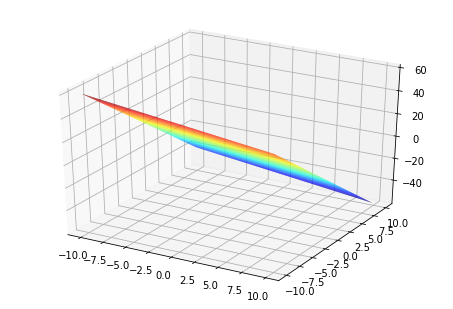

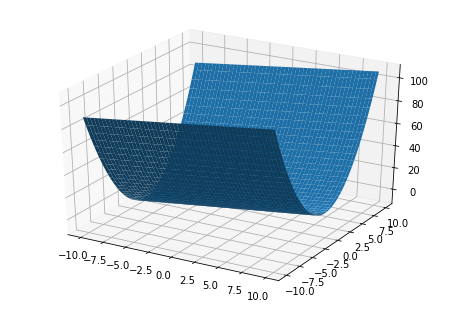

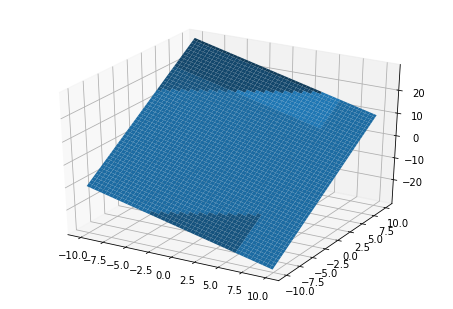

In [5]:
x = np.arange (-10, 10, 0.1)
y = np.arange (-10, 10, 0.1)
xgrid, ygrid = np.meshgrid(x, y)
zgrid = -xgrid -5*ygrid 
ggrid1 = xgrid + ygrid**2 - 1
ggrid2 = -xgrid + 2*ygrid 

fig1 = plt.figure()
axes1 = Axes3D(fig1)
axes1.plot_surface(xgrid, ygrid, zgrid, cmap = cm.jet)


fig2 = plt.figure()
axes2 = Axes3D(fig2)
axes2.plot_surface(xgrid, ygrid, ggrid1)

fig3 = plt.figure()
axes3 = Axes3D(fig3)
axes3.plot_surface(xgrid, ygrid, ggrid2)

plt.show()